In [11]:
from CNNTextClassifier import *
import datetime
from utils import *
from evaluateModel import *

In [12]:
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('')

In [13]:
emb_size=300
out_size=len(sve_kategorije)
batch_size=25
output_dir="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs=500
lr=0.005
filter_sizes=[1,2,3,5]
num_filters = 36
dropout_rate=0.1
train = True #ako želimo trenirati postavimo na True, a ako samo želimo evaluirati postojeći model onda na False
if train:
    ft = ucitajFasttext('../../')
    weights_matrix = getWeightsMatrix(char_list,ft)
else:
    weights_matrix = torch.from_numpy(np.zeros((len(char_list)+1, emb_size))).float() #dummy matrix da se ne mora ucitavati fasttext

In [14]:
# definiranje modela
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)

In [15]:
## ako zelimo trenirati
from trainModel import *
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr)
print('naučene težine modela u spremljene u:', model_weights_path)

train loss 0.350, val loss 0.312, val accuracy 0.890, and val rmse 1.022
train loss 0.123, val loss 0.320, val accuracy 0.929, and val rmse 0.671
train loss 0.088, val loss 0.406, val accuracy 0.924, and val rmse 0.795
train loss 0.086, val loss 0.416, val accuracy 0.936, and val rmse 0.679
train loss 0.087, val loss 0.448, val accuracy 0.936, and val rmse 0.731
train loss 0.073, val loss 0.476, val accuracy 0.926, and val rmse 0.720
train loss 0.071, val loss 0.567, val accuracy 0.924, and val rmse 0.767
train loss 0.080, val loss 0.590, val accuracy 0.939, and val rmse 0.638
train loss 0.061, val loss 0.585, val accuracy 0.929, and val rmse 0.720
train loss 0.061, val loss 0.587, val accuracy 0.939, and val rmse 0.626
naučene težine modela u spremljene u: results/20211117_193445/model.weights


Final evaluation on test set
test loss 0.189, test accuracy 0.923, test rmse 0.805, test microF1 0.838, test macroF1 0.923, test weightedF1 0.923
tensor([[0.9250, 0.0083, 0.0000, 0.0208, 0.0458],
        [0.0288, 0.9424, 0.0206, 0.0082, 0.0000],
        [0.2000, 0.3000, 0.5000, 0.0000, 0.0000],
        [0.0317, 0.0159, 0.0000, 0.9365, 0.0159],
        [0.0833, 0.0000, 0.0000, 0.0083, 0.9083]])


/home/rcoric/klasifikacija/CNNClassification_inftoprez/evaluateModel.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi, rotation=90)
/home/rcoric/klasifikacija/CNNClassification_inftoprez/evaluateModel.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + nazivi)


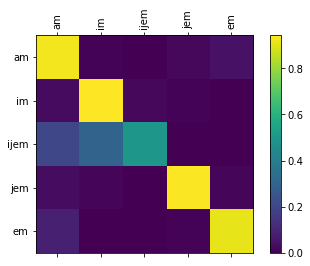

In [16]:
# evaluacija prethodno spremljenog modela
model_weights_path='results/20211117_193445/model.weights'
evaluateOnTestSet(model, model_weights_path, test_set,sve_kategorije)

prezent završava na: am


/home/rcoric/klasifikacija/CNNClassification_inftoprez/evaluateModel.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi)


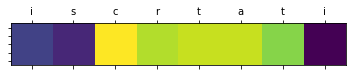

prezent završava na: am


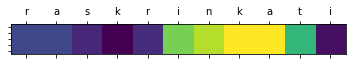

prezent završava na: am


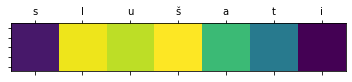

prezent završava na: im


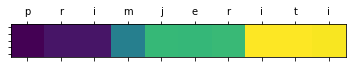

prezent završava na: im


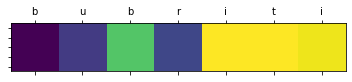

prezent završava na: im


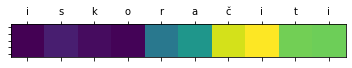

In [17]:
# heatmaps i predikcije za željene glagole
glagoli = ['iscrtati','raskrinkati','slušati','primjeriti','bubriti','iskoračiti']
for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)